In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import pandas_datareader as pdr

import math

from pandas_datareader import data

from datetime import datetime

https://fred.stlouisfed.org/series/DGS1MO

https://github.com/mortada/fredapi

https://python.hotexamples.com/examples/pandas_datareader.data/-/get_data_fred/python-get_data_fred-function-examples.html

In [4]:
start = datetime(year=2000, month=1, day=1)

In [5]:
GS30 = pdr.get_data_fred('GS30', start)
GS10 = pdr.get_data_fred('GS10', start)
DGS1MO = pdr.get_data_fred('DGS1MO', start)

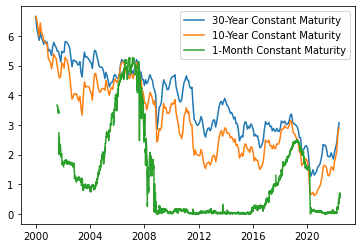

In [6]:
plt.plot(GS30, label = '30-Year Constant Maturity')
plt.plot(GS10, label = '10-Year Constant Maturity')
plt.plot(DGS1MO, label = '1-Month Constant Maturity')
plt.legend()
plt.show()

In [7]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 2, 8)
TSLA = web.DataReader('TSLA', 'yahoo', start, end)
print(TSLA.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-02  44.650002  42.652000  44.574001  43.862000  23822000.0  43.862000
2015-01-05  43.299999  41.431999  42.910000  42.018002  26842500.0  42.018002
2015-01-06  42.840000  40.841999  42.012001  42.256001  31309500.0  42.256001
2015-01-07  42.956001  41.956001  42.669998  42.189999  14842000.0  42.189999
2015-01-08  42.759998  42.001999  42.562000  42.124001  17212500.0  42.124001


In [8]:
TSLA['Adj Close']

Date
2015-01-02     43.862000
2015-01-05     42.018002
2015-01-06     42.256001
2015-01-07     42.189999
2015-01-08     42.124001
                 ...    
2021-02-02    872.789978
2021-02-03    854.690002
2021-02-04    849.989990
2021-02-05    852.229980
2021-02-08    863.419983
Name: Adj Close, Length: 1536, dtype: float64

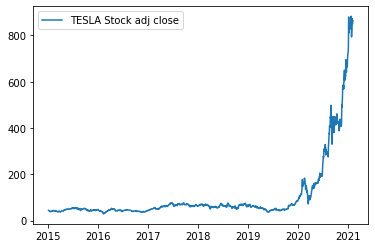

In [9]:
plt.plot(TSLA['Adj Close'], label = 'TESLA Stock adj close')
plt.legend()
plt.show()

In [10]:
TSLA["lag_1"] = TSLA["Adj Close"].shift(periods=-1)
TSLA["ret"] = np.log(TSLA["Adj Close"] / TSLA["lag_1"])
TSLA

,High,Low,Open,Close,Volume,Adj Close,lag_1,ret
Date,,,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000,42.018002,0.042950
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002,42.256001,-0.005648
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001,42.189999,0.001563
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999,42.124001,0.001566
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001,41.332001,0.018981
...,...,...,...,...,...,...,...,...
2021-02-02,880.500000,842.200012,844.679993,872.789978,24346200.0,872.789978,854.690002,0.020956
2021-02-03,878.080017,853.059998,877.020020,854.690002,18343500.0,854.690002,849.989990,0.005514
2021-02-04,856.500000,833.419983,855.000000,849.989990,15812700.0,849.989990,852.229980,-0.002632


(array([  1.,   1.,   2.,   2.,   0.,   0.,   4.,   3.,   1.,   7.,   6.,
          7.,   7.,  12.,  23.,  18.,  41.,  61., 119., 142., 181., 238.,
        218., 128., 113.,  71.,  40.,  28.,  14.,   8.,  12.,   9.,   4.,
          1.,   3.,   0.,   1.,   0.,   2.,   3.,   0.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([-0.18144503, -0.17308577, -0.16472651, -0.15636725, -0.14800799,
        -0.13964874, -0.13128948, -0.12293022, -0.11457096, -0.1062117 ,
        -0.09785244, -0.08949318, -0.08113392, -0.07277466, -0.0644154 ,
        -0.05605615, -0.04769689, -0.03933763, -0.03097837, -0.02261911,
        -0.01425985, -0.00590059,  0.00245867,  0.01081793,  0.01917718,
         0.02753644,  0.0358957 ,  0.04425496,  0.05261422,  0.06097348,
         0.06933274,  0.077692  ,  0.08605126,  0.09441052,  0.10276977,
         0.11112903,  0.11948829,  0.12784755,  0.13620681,  0.14456607,
         0.15292533,  0.16128459,  0.16964385,  0.1780031 ,  0.18636236,
 

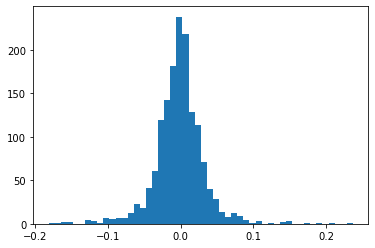

In [11]:
plt.hist(TSLA["ret"], bins=50)

In [12]:
np.percentile(TSLA["ret"], 99)

nan

In [13]:
x = TSLA["ret"].to_numpy()

In [14]:
np.percentile(TSLA["ret"].to_numpy(), 99)

nan

In [15]:
x = x[~np.isnan(x)]
np.percentile(x, 1)

-0.10535605052192251

In [17]:
np.mean(x)

-0.001941272245499163